In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
X = np.array([[1, 1, 1, 1, 1,
               1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 
               0, 5, 10, 1, 2]])

In [42]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [43]:
X.shape

(2, 10)

In [44]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

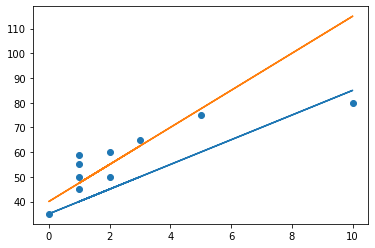

In [45]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)

In [46]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [47]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

In [48]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)

In [49]:
err1, err2

(94.0, -21.0)

In [50]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10

In [51]:
mae_1, mae_2

(10.4, 7.9)

In [52]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [53]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [54]:
X.shape

(2, 10)

In [55]:
X.T.shape

(10, 2)

In [56]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

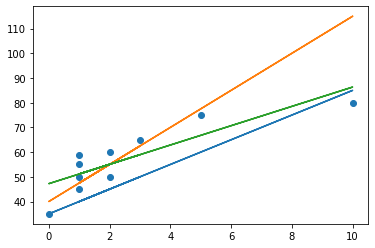

In [57]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [58]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [59]:
calc_mse(y, y_pred1)

143.6

In [60]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [61]:
calc_mae(y, y_pred1)

10.4

In [62]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [63]:
calc_mse(y, y_pred3)

45.93750000000002

In [64]:
calc_mae(y, y_pred3)

6.182142857142859

Градиентный спуск

In [65]:
n = 10
f = 1/n * np.sum((y_pred3 - y)**2)

In [66]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [67]:
W[0] - g


47.2321430605

#### 1. Подберите скорость обучения (alpha) и количество итераций:

In [86]:
n = X.shape[1]
alpha = 1e-3 # подобрана средняя скорость обучения
n_iter = 10000 # для средней скорости обучения увеличино на порядок количество итераций
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.001)

In [87]:
for i in range(n_iter):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % (n_iter // 10) == 0:
        print(i, W, err)

0 [1.1102 0.84  ] 3173.15
1000 [31.66648131  6.78503276] 176.46806566379882
2000 [41.73215361  4.92632937] 62.2342399245102
3000 [45.28877016  4.26957292] 47.97214782992787
4000 [46.54546925  4.03751382] 46.19152576288303
5000 [46.98951279  3.95551778] 45.96921511416331
6000 [47.14641166  3.92654521] 45.94145963171208
7000 [47.2018505  3.916308 ] 45.93799435998288
8000 [47.22143932  3.91269078] 45.937561720839334
9000 [47.22836086  3.91141266] 45.93750770584623


#### *2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

##### Вариант 1:

In [88]:
n = X.shape[1]
alpha = 1e-3
n_iter = 10000
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.001)

In [89]:
for i in range(n_iter):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
# добавлена опция суммирования вдоль строк матрицы (результата произведения матрицы на вектор), была сумма всей матрицы
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    if i % (n_iter // 10) == 0:
        print(i, W, err)

0 [1.1102 0.84  ] 3173.15
1000 [31.66648131  6.78503276] 176.46806566379882
2000 [41.73215361  4.92632937] 62.2342399245102
3000 [45.28877016  4.26957292] 47.97214782992787
4000 [46.54546925  4.03751382] 46.19152576288303
5000 [46.98951279  3.95551778] 45.96921511416331
6000 [47.14641166  3.92654521] 45.94145963171208
7000 [47.2018505  3.916308 ] 45.93799435998288
8000 [47.22143932  3.91269078] 45.937561720839334
9000 [47.22836086  3.91141266] 45.93750770584623


##### Вариант 2:

In [132]:
n = X.shape[1]
alpha = 1e-3
n_iter = 10000
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.001)

In [133]:
for i in range(n_iter):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
# заменено суммирование строк в произведении на матричное умножение вектора на матрицу (последняя транспонирована) 
    W -= (alpha * (1/n * 2 * (y_pred - y) @ X.T))
    if i % (n_iter // 10) == 0:
        print(i, W, err)

0 [1.1102 0.84  ] 3173.15
1000 [31.66648131  6.78503276] 176.46806566379882
2000 [41.73215361  4.92632937] 62.2342399245102
3000 [45.28877016  4.26957292] 47.97214782992787
4000 [46.54546925  4.03751382] 46.19152576288303
5000 [46.98951279  3.95551778] 45.96921511416331
6000 [47.14641166  3.92654521] 45.941459631712064
7000 [47.2018505  3.916308 ] 45.93799435998288
8000 [47.22143932  3.91269078] 45.937561720839334
9000 [47.22836086  3.91141266] 45.93750770584623


#### *3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [182]:
n = X.shape[1]
alpha = 1e-3
tol = 0.0001 # добавлен порог изменения ошибки
n_iter = 10000
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.001)

In [183]:
err_prev = 10000
err = 5000
i = 0
while (err_prev - err) > tol: # заменен цикл по итерациям на цикл по условию превышения порога изменения ошибки
    y_pred = np.dot(W, X)
    err_prev = err
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * (y_pred - y) @ X.T))
    i += 1
    if i % (n_iter // 10) == 0:
        print(i, W, err)
print(i, W, err, err_prev)


1000 [31.6502796   6.78802453] 176.7399358190342
2000 [41.72642888  4.92738649] 62.26818291089486
3000 [45.28674737  4.26994644] 47.97638561146634
4000 [46.54475452  4.0376458 ] 46.192054849869194
4802 [46.93370497  3.96582312] 45.985482731202794 45.985582670037175
